In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmts = pd.read_csv('dienmayxanh_cmts.csv')
cmts.head()

,comment,label
0,quạt sài ok,0
1,giới thiệu bạn bè,0
2,công suất yếu tiêu thụ điện năng cao vật liệu ...,1
3,điện máy xanh tin cậy khách hàng,0
4,rò rỉ rò rỉ nước máy lọc vật liệu rẻ tiền thất...,1


In [3]:
X = cmts['comment']
Y = cmts['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True, random_state=42)
len(X_train), len(X_test)

(6732, 1683)

In [4]:
X_train.isna().sum()

np.int64(0)

Sử dụng BOW

In [5]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

X_dense = X_train_counts.toarray()
vocab = count_vect.get_feature_names_out()



In [ ]:
print(", ".join(vocab))

ai, aluminum, am, an, anh, app, aqua, asia, auto, ba, bac, ban, banh, bao, bass, bavia, bay, be, beko, best, bi, binh, bit, biêt, biến, biếng, biết, biểu, biệt, bloc, block, bo, board, bt, bu, bung, buôn, buông, buốt, buồn, buộc, bye, bà, bàn, bàng, bành, bày, bác, bách, bám, bán, bánh, báo, bát, bât, bây, bãi, bão, bè, bèo, bé, bê, bên, bênh, bì, bình, bí, bíp, bít, bíu, bó, bóc, bóng, bôi, bù, bùn, bút, băn, băng, bơm, bước, bạc, bạn, bảm, bản, bảng, bảo, bấm, bất, bẩn, bận, bập, bật, bắc, bắn, bắt, bằng, bặm, bặt, bẻ, bẻn, bề, bền, bể, bỉ, bị, bịp, bọc, bọn, bọt, bỏ, bố, bốc, bốn, bổ, bộ, bội, bộn, bớt, bụi, bụng, bụp, bức, bừa, bửa, bữa, bự, bực, ca, cach, cafesửa, caffe, cai, cam, can, canh, cao, cap, capsper, care, cf, chai, chang, chao, chap, chat, chay, che, check, chi, chiecs, china, chinh, chip, chiếm, chiếu, chiều, chiệu, cho, choáng, chu, chua, chug, chung, chuyên, chuyển, chuyện, chuông, chuẩn, chuốt, chà, chào, chày, chán, cháu, cháy, châ, châm, chân, chât, chã, chéo, chê

Sử dụng TF-IDF

In [6]:
TfidfTransformer = TfidfVectorizer(
    ngram_range=(1, 2),
    smooth_idf=True,
    use_idf=True,
    sublinear_tf=True
)
X_train_tfidf = TfidfTransformer.fit_transform(X_train)
X_test_tfidf = TfidfTransformer.transform(X_test)

Mô hình Native Bayes

In [7]:
model_counts_nb = MultinomialNB()

print("Bắt đầu train")
model_counts_nb.fit(X_train_counts, Y_train)

print("Đã xong")

Bắt đầu train
Đã xong


In [8]:
model_tfidf_nb = MultinomialNB()

print("Bắt đầu train")
model_tfidf_nb.fit(X_train_tfidf, Y_train)

print("Đã xong")

Bắt đầu train
Đã xong


Đánh giá

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       893
           1       0.92      0.76      0.84       790

    accuracy                           0.86      1683
   macro avg       0.87      0.85      0.86      1683
weighted avg       0.87      0.86      0.86      1683



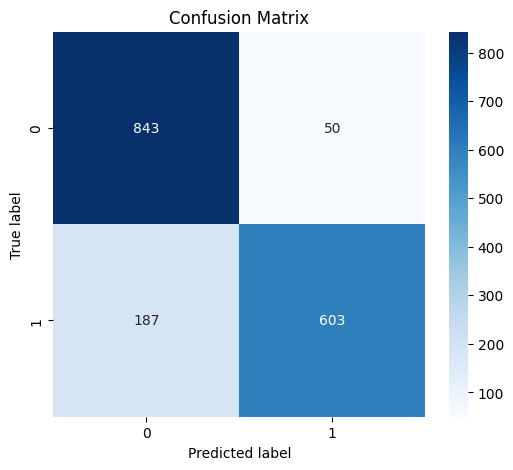

In [19]:
y_pred_counts_nb = model_counts_nb.predict(X_test_counts)

cm_counts_nb = confusion_matrix(Y_test, y_pred_counts_nb)

print(classification_report(Y_test, y_pred_counts_nb))
plt.figure(figsize=(6,5))
sns.heatmap(cm_counts_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.savefig('cm_counts_nb.png')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       893
           1       0.93      0.76      0.84       790

    accuracy                           0.86      1683
   macro avg       0.87      0.86      0.86      1683
weighted avg       0.87      0.86      0.86      1683



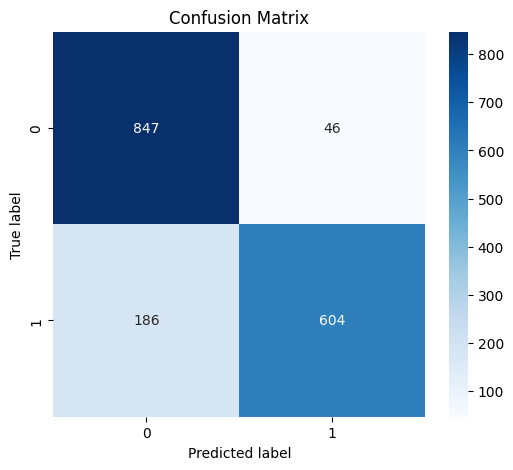

In [20]:
y_pred_tfidf_nb = model_tfidf_nb.predict(X_test_tfidf)

cm_tfidf_nb = confusion_matrix(Y_test, y_pred_tfidf_nb)

print(classification_report(Y_test, y_pred_tfidf_nb))
plt.figure(figsize=(6,5))
sns.heatmap(cm_tfidf_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.savefig('cm_tfidf_nb.png')
plt.show()

Mô Hình SVM

In [15]:
model_counts_svm = SVC()

print("Bắt đầu train")
model_counts_svm.fit(X_train_counts, Y_train)

print("Đã xong")

Bắt đầu train
Đã xong


In [16]:
model_tfidf_svm = SVC()

print("Bắt đầu train")
model_tfidf_svm.fit(X_train_tfidf, Y_train)

print("Đã xong")

Bắt đầu train
Đã xong


Đánh giá

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       893
           1       0.99      0.84      0.91       790

    accuracy                           0.92      1683
   macro avg       0.93      0.91      0.92      1683
weighted avg       0.93      0.92      0.92      1683



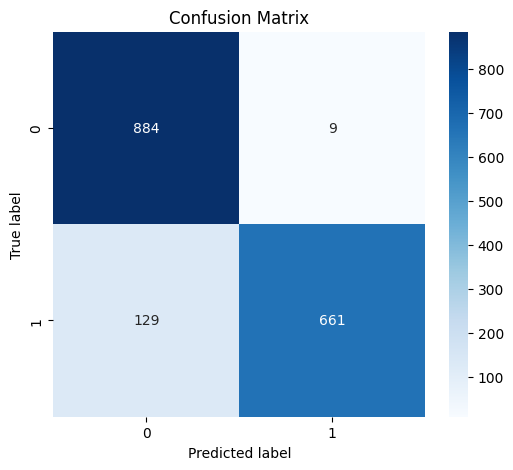

In [21]:
y_pred_counts_svm = model_counts_svm.predict(X_test_counts)

cm_counts_svm = confusion_matrix(Y_test, y_pred_counts_svm)

print(classification_report(Y_test, y_pred_counts_svm))
plt.figure(figsize=(6,5))
sns.heatmap(cm_counts_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.savefig('cm_counts_svm.png')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       893
           1       0.98      0.83      0.90       790

    accuracy                           0.91      1683
   macro avg       0.92      0.91      0.91      1683
weighted avg       0.92      0.91      0.91      1683



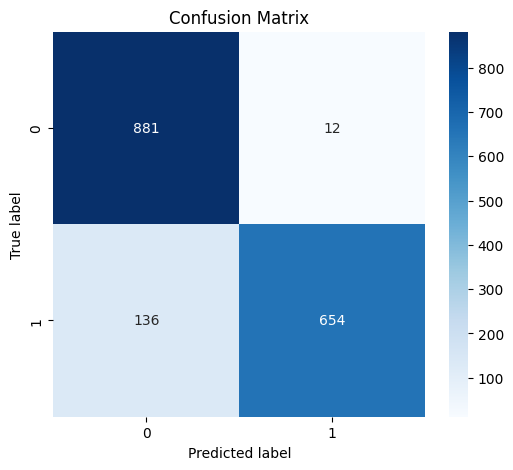

In [22]:
y_pred_tfidf_svm = model_tfidf_svm.predict(X_test_tfidf)

cm_tfidf_svm = confusion_matrix(Y_test, y_pred_tfidf_svm)

print(classification_report(Y_test, y_pred_tfidf_svm))
plt.figure(figsize=(6,5))
sns.heatmap(cm_tfidf_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.savefig('cm_tfidf_svm.png')
plt.show()